# Numerical differentiation.

Remember that 

$$
f'(x)=\lim_{h\rightarrow 0} \frac{f(x+h)- f(x)}{h}
$$

what if we avoid to let $h\rightarrow 0$, but use a very small number? We can write:

$$
f'(x) \sim \frac{f(x+h)- f(x)}{h}.
$$

But it could also be 
$$
f'(x) \sim \frac{f(x)- f(x-h)}{h}.
$$
and even
$$
f'(x) \sim \frac{f(x+h)- f(x-h)}{2h}.
$$

What is the error on this approximation?


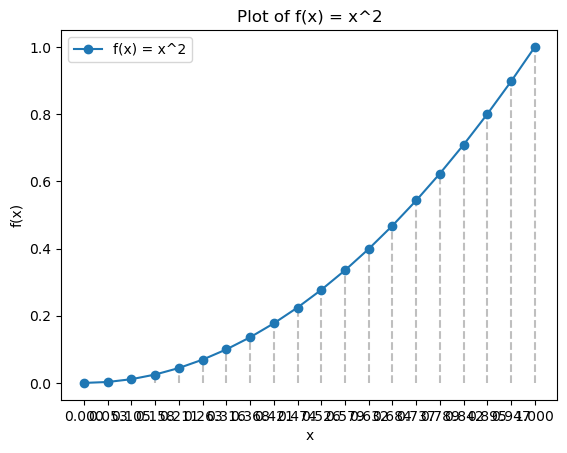

x: [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
Numerical derivative of x^2 at x: [0.05263158 0.15789474 0.26315789 0.36842105 0.47368421 0.57894737
 0.68421053 0.78947368 0.89473684 1.         1.10526316 1.21052632
 1.31578947 1.42105263 1.52631579 1.63157895 1.73684211 1.84210526
 1.94736842 1.94736842]
Exact derivative of x^2 at x: [0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]
Error in numerical derivative: [ 0.05263158  0.05263158  0.05263158  0.05263158  0.05263158  0.05263158
  0.05263158  0.05263158  0.05263158  0.05263158  0.05263158  0.05263158
  0.05263158  0.05263158  0.05263158  0.05263158  0.05263158  0.05263158
  0.0526

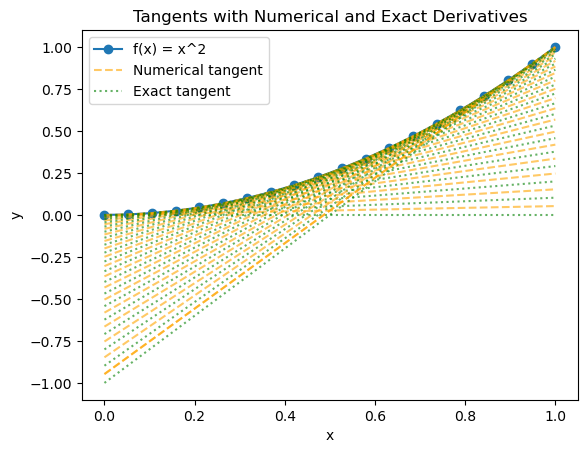

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the interval and number of partitions
a, b = 0, 1
n = 20
x = np.linspace(a, b, n)

# Define the function and its lambda
f = lambda x: x**2
df= lambda x: 2*x**1  # Derivative of f(x) = x^2

# Plot the function
plt.vlines(x, ymin=0, ymax=f(x), colors='gray', linestyles='dashed', alpha=0.5)
plt.xticks(x)
plt.plot(x, f(x), label='f(x) = x^2', marker='o')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^2')
plt.legend()
plt.show()

# Calculate numerical derivatives at each x (forward difference, except last point)
h = x[1] - x[0]
df_dx = np.zeros_like(x)
df_dx[:-1] = (f(x[1:]) - f(x[:-1])) / h
df_dx[-1] = (f(x[-1]) - f(x[-2])) / h  # backward difference for last point

print("x:", x)
print("Numerical derivative of x^2 at x:", df_dx)
# Calculate the exact derivative
exact_derivative = df(x)    
print("Exact derivative of x^2 at x:", exact_derivative)
# Calculate the error
error = df_dx - exact_derivative
print("Error in numerical derivative:", error)  

# Plot tangent lines at each x using numerical and exact derivatives
plt.plot(x, f(x), label='f(x) = x^2', marker='o')

for xi, fi, slope_num, slope_exact in zip(x, f(x), df_dx, exact_derivative):
    # Line using numerical derivative
    y_num = slope_num * (x - xi) + fi
    plt.plot(x, y_num, '--', color='orange', alpha=0.6, label='Numerical tangent' if xi == x[0] else "")
    # Line using exact derivative
    y_exact = slope_exact * (x - xi) + fi
    plt.plot(x, y_exact, ':', color='green', alpha=0.6, label='Exact tangent' if xi == x[0] else "")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Tangents with Numerical and Exact Derivatives')
plt.legend()
plt.show()

We have used Python’s numpy library *np.linspace()* function, that partitions an interval in exactly the way that we want. The command takes the form *np.linspace(a, b, n)* where the interval is $[a,b]$ and $n$ the number of points used to create the partition. For example, *np.linspace(0,1,5)* will produce the list of numbers 0, 0.25, 0.5, 0.75, 1. Notice that there are 5 total points, the first point is $0$, the last point is $1$, and there are $4$ total sub intervals in the partition. Hence, if we want to partition the interval  into 20 equal sub intervals then we would use the command np.linspace(0,1,21) which would result in a list of numbers starting with 0, 0.05, 0.1, 0.15, etc. 

What command would you use to partition the interval $[5,10]$ into 100 equal sub intervals?

### Tasks
1. Why do you think the errors are the same for all $x$ values when $f(x)=x^2$?
2. Try change the lambda functions to treat $x^3$. What do you notice?
3. Focus on $x=0.25$ and $f(x)=x^2$, what will be the error for numerical derivative when $h=0.1$,$h=0.05$, and $h=0.025$? A skeleton code is provided in the next python cell. 


In [12]:
# Task 3: Focus on x=0, what will be the error for numerical derivative when h=0.1, h=0.05, and h=0.025?

# Define the function and its derivative
f = lambda x: x**2
df = lambda x: 2*x

# Values of h to test
h_values = [0.1, 0.05, 0.025]

# x value to focus on
x0 = 0.25

# Loop over each h, compute numerical derivative and error
for h in h_values:
    # Numerical derivative at x0 using forward difference
    num_derivative = 0 #fill in the right hand side
    # Exact derivative at x0
    exact = 0 #fill in the right hand side
    # Error
    error = 0 #fill in the right hand side
    print(f"h={h}: numerical derivative={num_derivative}, exact={exact}, error={error}")

h=0.1: numerical derivative=0, exact=0, error=0
h=0.05: numerical derivative=0, exact=0, error=0
h=0.025: numerical derivative=0, exact=0, error=0



### Error estimates using Taylor expansion

Taylor expansion of $f(x+h)$ will be
$$
f(x+h)\sim f(x)+hf'(x)+\frac{1}{2}h^2 f''(x)+ O(h^3). 
$$

Rearranging

$$
f'(x) - \frac{f(x+h)- f(x)}{h} \sim \frac{1}{2}h^2 f''(x)+ O(h^3) = O(h^2). 
$$

### Tasks:
1. Do the tasks above again, with this in mind. What do you notice? 

## Optimal h
Is it as small as possible? No. Our error is 
$$
E = c h +\frac{\delta}{h},
$$
with $c$ and $\delta$ being constants. The minima of this will be at 
$$
c-\frac{\delta}{h^2}=0 \Rightarrow h=\sqrt{\frac{\delta}{c}} \Rightarrow h=O(\sqrt{\delta})
$$

In [ ]:
# Find machine precision (epsilon) for float type in numpy
eps = np.finfo(float).eps
print("Machine precision (epsilon) for float:", eps)
np.sqrt(eps)  # Square root of machine precision


Machine precision (epsilon) for float: 2.220446049250313e-16


np.float64(1.4901161193847656e-08)

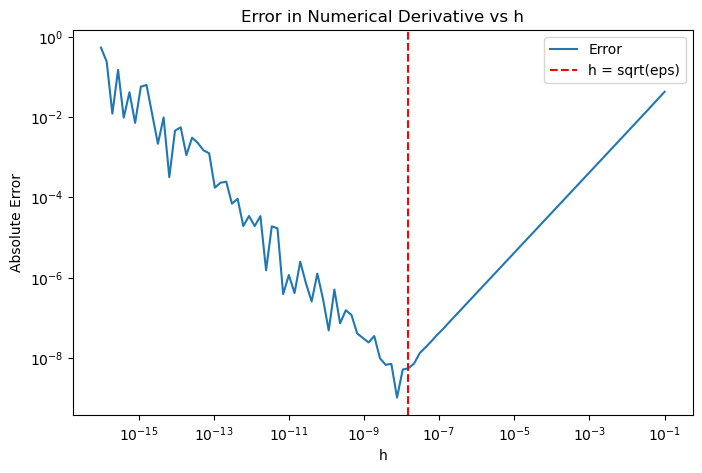

Minimum error occurs near h = 7.56e-09
Error at h = sqrt(eps) (1.49e-08): 5.55e-09


In [15]:
# Define the function and its derivative
f = lambda x: np.sin(x)
df = lambda x: np.cos(x)

# Choose a point to evaluate the derivative
x0 = 1.0

# Machine precision
eps = np.finfo(float).eps
h_values = np.logspace(-16, -1, 100)
errors = []

for h in h_values:
    num_derivative = (f(x0 + h) - f(x0)) / h
    exact = df(x0)
    error = np.abs(num_derivative - exact)
    errors.append(error)

# Find h closest to sqrt(eps)
h_opt = np.sqrt(eps)
idx_opt = np.argmin(np.abs(h_values - h_opt))

plt.figure(figsize=(8,5))
plt.loglog(h_values, errors, label='Error')
plt.axvline(h_opt, color='red', linestyle='--', label='h = sqrt(eps)')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title('Error in Numerical Derivative vs h')
plt.legend()
plt.show()

print(f"Minimum error occurs near h = {h_values[np.argmin(errors)]:.2e}")
print(f"Error at h = sqrt(eps) ({h_opt:.2e}): {errors[idx_opt]:.2e}")

# Higher order 

$$
f(x+h)= f(x)+hf'(x)+\frac{1}{2}h^2 f''(x)+ O(h^3) \\
f(x-h)= f(x)-hf'(x)+\frac{1}{2}h^2 f''(x)+ O(h^3) \\
$$
subtract the two equations and divide with 2h
$$
f'(x)=\frac{f(x+h)- f(x-h)}{2h} + O(h^2) 
$$
Now the error is
$$
E = c h^2 +\frac{\delta}{h},
$$
with minimum at 
$$
2 c h - \frac{\delta}{h^2}=0 \Rightarrow h\sim 
$$


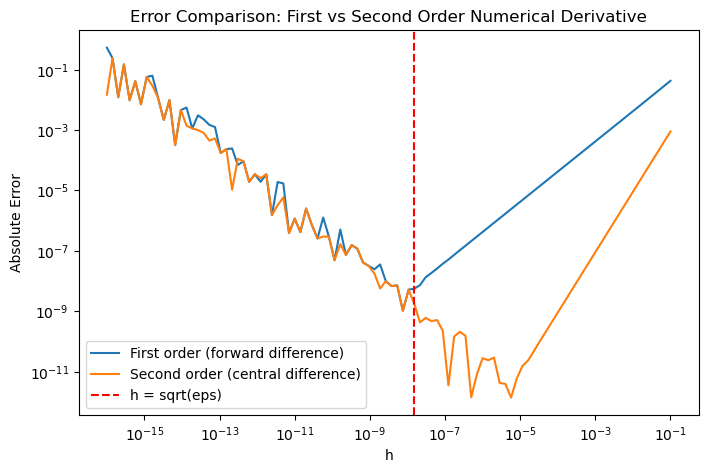

In [16]:
# Compare first order (forward difference) and second order (central difference) schemes for derivative of sin(x) at x0

f = lambda x: np.sin(x)
df = lambda x: np.cos(x)
x0 = 1.0

h_values = np.logspace(-16, -1, 100)
errors_first = []
errors_second = []

for h in h_values:
    # First order (forward difference)
    num_deriv_first = (f(x0 + h) - f(x0)) / h
    # Second order (central difference)
    num_deriv_second = (f(x0 + h) - f(x0 - h)) / (2 * h)
    exact = df(x0)
    errors_first.append(np.abs(num_deriv_first - exact))
    errors_second.append(np.abs(num_deriv_second - exact))

plt.figure(figsize=(8,5))
plt.loglog(h_values, errors_first, label='First order (forward difference)')
plt.loglog(h_values, errors_second, label='Second order (central difference)')
plt.axvline(np.sqrt(eps), color='red', linestyle='--', label='h = sqrt(eps)')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title('Error Comparison: First vs Second Order Numerical Derivative')
plt.legend()
plt.show()

## Second order derivative
Taylor expansion, again.
$$
f(x+h)= f(x)+hf'(x)+\frac{1}{2}h^2 f''(x)+ \frac{1}{3!}h^3f'''(x)+O(h^4) \\[5mm]
f(x-h)= f(x)-hf'(x)+\frac{1}{2}h^2 f''(x)- \frac{1}{3!}h^3f'''(x)+O(h^4) 
$$
Now we want $f''(x)$ add the equations:
$$
f(x+h) + f(x-h) = 2 f(x)+h^2 f''(x)+O(h^4)\\[5mm]
\Downarrow \\[5mm]
f''(x) = \frac{f(x+h)- 2f(x) + f(x-h)}{h^2} +O(h^2)
$$

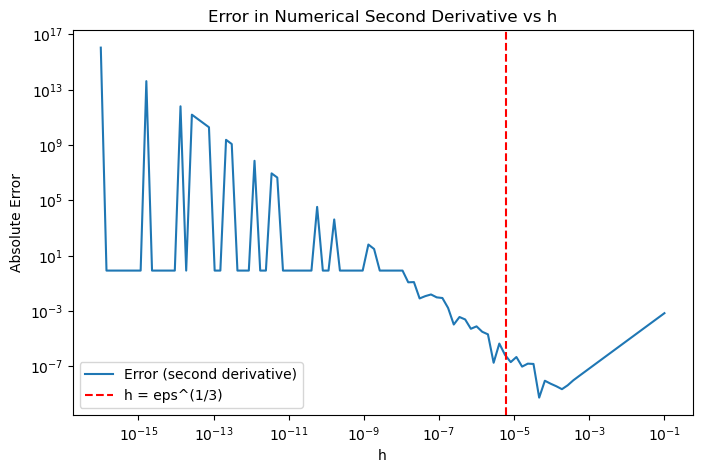

Minimum error occurs near h = 4.64e-05
Error at h = eps^(1/3) (6.06e-06): 6.75e-07


In [17]:
# Demonstrate optimal h for second order derivative using central difference

# Function and its second derivative
f = lambda x: np.sin(x)
d2f = lambda x: -np.sin(x)

x0 = 1.0  # Point to evaluate
h_values = np.logspace(-16, -1, 100)
errors_second_deriv = []

for h in h_values:
    # Central difference for second derivative
    num_second_deriv = (f(x0 + h) - 2*f(x0) + f(x0 - h)) / h**2
    exact = d2f(x0)
    errors_second_deriv.append(np.abs(num_second_deriv - exact))

# Estimate optimal h: for second order, optimal h ~ (machine epsilon)^(1/3)
h_opt2 = eps**(1/3)
idx_opt2 = np.argmin(np.abs(h_values - h_opt2))

plt.figure(figsize=(8,5))
plt.loglog(h_values, errors_second_deriv, label='Error (second derivative)')
plt.axvline(h_opt2, color='red', linestyle='--', label='h = eps^(1/3)')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title('Error in Numerical Second Derivative vs h')
plt.legend()
plt.show()

print(f"Minimum error occurs near h = {h_values[np.argmin(errors_second_deriv)]:.2e}")
print(f"Error at h = eps^(1/3) ({h_opt2:.2e}): {errors_second_deriv[idx_opt2]:.2e}")

## Differential equations
What if we don't now the function, like in differential equations? This is where discretization enters the arena. 

This code demonstrates the discretization of the first-order ordinary differential equation (ODE) $\frac{dy}{dx} = -y$ with the initial condition $y(0) = 1$ using the Forward Euler method. The Forward Euler method is an explicit numerical scheme for solving ODEs, where the next value is estimated using the current value and the derivative at that point.

The ODE is discretized over the interval $[0, 5]$ with 50 steps. At each step, the numerical solution is updated as:
$$
y_{i+1} = y_i + h \cdot f(y_i, x_i)
$$
where $h$ is the step size and $f(y, x) = -y$ is the right-hand side of the ODE.

The code also computes the exact solution $y(x) = e^{-x}$ for comparison and plots both the numerical and exact solutions to illustrate the accuracy of the Forward Euler method.
# Define the ODE: dy/dx = -y

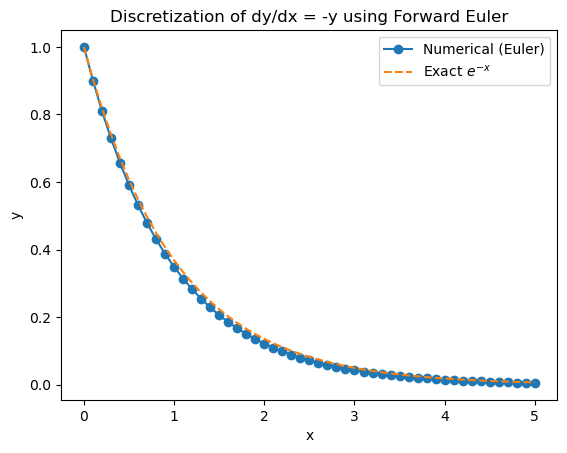

In [20]:
# Example: Discretization of the first order ODE dy/dx = -y, y(0) = 1 using Forward Euler method

def f(y, x):
    return -y

# Discretization parameters
x_start, x_end = 0, 5
n_steps = 50
x_vals = np.linspace(x_start, x_end, n_steps + 1)
h = (x_end - x_start) / n_steps

# Initial condition
y = np.zeros_like(x_vals)
y[0] = 1

# Forward Euler iteration
for i in range(n_steps):
    y[i+1] = y[i] + h * f(y[i], x_vals[i])

# Exact solution for comparison
y_exact = np.exp(-x_vals)

plt.plot(x_vals, y, 'o-', label='Numerical (Euler)')
plt.plot(x_vals, y_exact, '--', label='Exact $e^{-x}$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Discretization of dy/dx = -y using Forward Euler')
plt.legend()
plt.show()